# 1. Práctica *Machine Learning* - Problema de regresión para predecir el precio de un airbnb



## 1. Carga de datos y División train/test
Se va a dividir el conjunto de datos en dos partes: entrenamiento (train) y prueba (test).
Dividir los datos en train y test sirve para entrenar el modelo con una parte de los datos y evaluar su desempeño con otra que no ha visto. Esto ayuda a comprobar si el modelo puede generalizar bien a nuevos datos o si simplemente memorizó los del entrenamiento (overfitting).

Puesto que el conjunto de datos tiene una gran cantidad de valores, en este caso, la división va a ser un 80% de los datos para train y un 20% para test.



Primero cargamos los datos:

In [807]:
# Se hacen las importaciones necesarias para toda la práctica.

import pandas as pd
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder
import matplotlib.pyplot as plt

In [808]:
airbnbData = pd.read_csv("./airbnb-listings-extract.csv", sep=';', encoding = "latin")
print(airbnbData.shape)
airbnbData.head(3)

(14780, 89)


,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza CataluÃ±a Catalonia Square is the larg...,...,10.0,8.0,10.0,HUTB-006721,NaN,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ..."
2,17584891,https://www.airbnb.com/rooms/17584891,20170407214050,2017-04-08,"Style Terrace Red, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza CataluÃ±a Catalonia Square is the larg...,...,NaN,NaN,NaN,HUTB-007527,NaN,super_strict_30,106.0,NaN,"41.3930345489,2.16217327868","Host Has Profile Pic,Requires License,Instant ..."


Y a continuación, se hace la división de los datos en los conjuntos de Train y Test.

In [809]:
# Se dividen los datos en conjuntos de entrenamiento y prueba. 
train, test = train_test_split(airbnbData, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos los dos datasets en archivos csv
train.to_csv('./airbnbTrain.csv', sep=';', decimal='.', index=False)
test.to_csv('./airbnbTest.csv', sep=';', decimal='.', index=False)

# Ahora se va a trabajr exclusivamente con el dataset de train. 
airbnbTrain = pd.read_csv('./airbnbTrain.csv', sep=';', decimal='.')
airbnbTrain.head(5)


Dimensiones del dataset de training: (11824, 89)
Dimensiones del dataset de test: (2956, 89)


,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,5994463,https://www.airbnb.com/rooms/5994463,20170407214119,2017-04-08,PISO ATOCHA- FLAT NEAR ATOCHA .,Piso reciÃ©n reformado cÃ³moda habitaciÃ³n con...,"Un piso muy cÃ³modo en JerÃ³nimos, una de las ...",Piso reciÃ©n reformado cÃ³moda habitaciÃ³n con...,none,El barrio de Jeronimos es un enclave tranquilo...,...,10.0,10.0,9.0,NaN,NaN,moderate,2.0,0.50,"40.4077318793,-3.68481869733","Host Has Profile Pic,Is Location Exact,Require..."
1,14136180,https://www.airbnb.com/rooms/14136180,20170407214119,2017-04-08,The Palace Sol Madrid.,"Lugares de interÃ©s: Plaza Mayor, Plaza del So...",El apartamento dispone de un dormitorio indepe...,"Lugares de interÃ©s: Plaza Mayor, Plaza del So...",none,"Situado en el corazÃ³n de Madrid, este apartam...",...,10.0,10.0,10.0,NaN,NaN,flexible,1.0,2.43,"40.4158022422,-3.70534037765","Host Has Profile Pic,Host Identity Verified,Re..."
2,15520134,https://www.airbnb.com/rooms/15520134,20170407214119,2017-04-08,por persona la noche metro linea5 vista alegre,æçæ¿æºé è¿é¤å åé¤é¥®ãéåå®¶å...,NaN,æçæ¿æºé è¿é¤å åé¤é¥®ãéåå®¶å...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,moderate,16.0,NaN,"40.3890481626,-3.74037392557","Host Has Profile Pic,Host Identity Verified,Is..."
3,8809721,https://www.airbnb.com/rooms/8809721,20170407214119,2017-04-08,CITY CENTER JACINTO BENAVENTE ROOM4,This stunning and amazig room is covered with ...,NaN,This stunning and amazig room is covered with ...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,strict,97.0,NaN,"40.4128140929,-3.70305247638","Host Has Profile Pic,Requires License"
4,1162707,https://www.airbnb.com/rooms/1162707,20170407214119,2017-04-08,NICE & BIG DOUBLE ROOM AT DOWNTOWN,NaN,We are a young couple; David (Spain) and Ana (...,We are a young couple; David (Spain) and Ana (...,none,NaN,...,10.0,9.0,9.0,NaN,NaN,strict,2.0,2.08,"40.4386311984,-3.71371613279","Host Has Profile Pic,Host Identity Verified,Is..."


# 2. Análisis exploratorio
Para analizar el dataset, aplicamos las funciones de la librería Pandas como son, describe, dtypes, shape, etc.

In [810]:
airbnbData.describe()

,ID,Scrape ID,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,1.478000e+04,1.478000e+04,1.478000e+04,12881.000000,14777.000000,14777.000000,14780.000000,14780.000000,14780.000000,14725.000000,...,14780.000000,11476.000000,11454.000000,11460.000000,11443.000000,11460.000000,11440.000000,11439.000000,14776.000000,11618.000000
mean,1.028089e+07,2.017037e+13,3.608080e+07,94.823461,12.513636,12.513636,40.497626,-3.858041,3.277808,1.281732,...,22.632273,91.697978,9.416012,9.328883,9.621778,9.647033,9.532168,9.218201,9.486871,1.870014
std,5.564829e+06,5.667971e+08,3.425360e+07,15.215988,34.090223,34.090223,4.641387,14.123146,2.097291,0.658517,...,38.290244,8.989101,0.921938,0.989933,0.802736,0.767116,0.774527,0.950578,23.626014,1.867550
min,1.862800e+04,2.016010e+13,1.745300e+04,0.000000,0.000000,0.000000,-37.851182,-123.131344,1.000000,0.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.020000
25%,5.554732e+06,2.017041e+13,6.787360e+06,100.000000,1.000000,1.000000,40.409726,-3.707604,2.000000,1.000000,...,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,0.450000
50%,1.133492e+07,2.017041e+13,2.464875e+07,100.000000,2.000000,2.000000,40.419466,-3.700785,3.000000,1.000000,...,7.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.200000
75%,1.532631e+07,2.017041e+13,5.432919e+07,100.000000,6.000000,6.000000,40.430916,-3.684057,4.000000,1.000000,...,27.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.780000
max,1.910969e+07,2.017062e+13,1.247534e+08,100.000000,519.000000,519.000000,55.966912,153.371427,16.000000,8.000000,...,446.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,145.000000,17.210000


Gracias al método describe, se puede obervar que no todas las columnas tienen el mismo número de valores, lo que indica que hay variables con valores a null o variables que verdadermanete no necesitamos para el modelo.
Además, también se puede ver que hay características que no van a  aportar valor al modelo de entrenamiento, por lo que se hará un eliminado de las mismas.

A continuación, se va a mostrar los valores de la columna Price, que es el target.

In [811]:
# Ver las estadísticas descriptivas solo para la columna 'price'
airbnbData['Price'].describe()


count    14763.000000
mean        73.561471
std         72.062050
min          9.000000
25%         34.000000
50%         55.000000
75%         86.000000
max        999.000000
Name: Price, dtype: float64

Le media del precio es de 73.561471. Esta medida se tendrá en cuenta cuando se entrene el modelo para comparar el error obtenido en la predicción del precio por noche en los airbnbs.

### Eliminación de características.
Tras haber visto todas las columnas del dataset, se puede afirmar que hay columnas que no van a aportar valor al modelo, sino que van a meter ruido. 
Estas columnas son todas aquellas que contienen descripciones, URLs, nombres, fechas, IDs, textos escritos por los usuarios, imágenes, direcciones, etc.
A continuación, se van a borrar todas estas columnas nombradas:

In [812]:
# Listado de columnas irrelevantes a eliminar
columns_to_drop = ['ID', 'Listing Url', 'Scrape ID',  'Name', 'Summary','Space','Neighborhood Overview',
                   'Notes','Transit','Access', 
                   'Interaction', 'House Rules',
                   'Description', 'Experiences Offered', 'Thumbnail Url', 'Medium Url',
                   'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Name',
                   'Host Since', 'Host Location', 
                   'Host Thumbnail Url', 'Host Picture Url',  'Street', 
                   'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed',  'State',
                   'Zipcode', 'Market', 'Smart Location',  
                   'Calendar Updated',
                   'Calendar last Scraped','Host About', 'Host Response Time',
                    'Host Neighbourhood',  'Security Deposit',
                    'First Review', 'Last Review', 
                    'Jurisdiction Names', 'Last Scraped', 'Geolocation', 'Longitude','Latitude']

# Eliminar las columnas irrelevantes
airbnbData = airbnbData.drop(columns=columns_to_drop)

In [813]:
print(f'Número de columnas en airbnbData tras el borrado: {airbnbData.shape[1]}')

Número de columnas en airbnbData tras el borrado: 44


### Tratamiento de valores null.
Vamos a ver si verdaderamente hay valores null en los datos:

In [814]:
airbnbData.isnull().sum()

Host Response Rate                 1899
Host Acceptance Rate              14741
Host Listings Count                   3
Host Total Listings Count             3
Host Verifications                    9
Neighbourhood                      5229
City                                  6
Country Code                          0
Country                               1
Property Type                         0
Room Type                             0
Accommodates                          0
Bathrooms                            55
Bedrooms                             25
Beds                                 49
Bed Type                              0
Amenities                           170
Square Feet                       14182
Price                                17
Weekly Price                      11190
Monthly Price                     11219
Cleaning Fee                       6093
Guests Included                       0
Extra People                          0
Minimum Nights                        0


Hay columnas que tienen muy pocos valores a null, pero en cambio hay otras con un valor bastante grande de valores null. 

Para aquellas columnas con más del 10% de sus valores nulos, vamos a eliminarlas para evitar introducir un gran sesgo al modelo.
Aquellas con menos del 10% de valores nulos, vamos a intentar imputar los valores nulos en lugar de eliminarlas.

#### Eliminación columnas con muchos valores nulos

In [815]:
# Se calcula el porcentaje de valores nulos en cada columna
null_percentage = airbnbData.isnull().mean() * 100

# Se filtran las columnas con más del 10% de valores nulos
columns_to_drop = null_percentage[null_percentage > 10].index

print(f'Columnas con más del 10 por ciento de valores nulos: {columns_to_drop}')

Columnas con más del 10 por ciento de valores nulos: Index(['Host Response Rate', 'Host Acceptance Rate', 'Neighbourhood',
       'Square Feet', 'Weekly Price', 'Monthly Price', 'Cleaning Fee',
       'Has Availability', 'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'License', 'Reviews per Month'],
      dtype='object')


Se procede a la eliminación de estas columnas.

In [816]:
airbnbData = airbnbData.drop(columns=columns_to_drop)

print(f'Número de columnas en airbnbData tras el borrado: {airbnbData.shape[1]}')

Número de columnas en airbnbData tras el borrado: 27


#### Imputación de valores null

Procedemos a la imputación de valores para las columnas con menos del 10% de sus valores en null:

In [817]:
# Se vuelve a calcular el porcentaje de valores nulos en cada columna
null_percentage = airbnbData.isnull().mean() * 100

# Se filtran las columnas con menos del 10% de valores nulos
columns_with_few_nulls = null_percentage[null_percentage <= 10].index

print(f'Columnas con menos del 10% de valores nulos: {columns_with_few_nulls}')

# Se imputan valores en los valores null usando el valor más frecuente (moda) de cada columna
for column in columns_with_few_nulls:
    airbnbData[column] = airbnbData[column].fillna(airbnbData[column].mode()[0])

# Imprimir las columnas que cumplen la condición airbnbData.isnull().any() para ver si queda alguna:
columns_with_nulls = airbnbData.columns[airbnbData.isnull().any()]

# Se comprueba que no quedan columnas con valores nulo
print(f'Columnas que tienen al menos un valor nulo: {columns_with_nulls}')

Columnas con menos del 10% de valores nulos: Index(['Host Listings Count', 'Host Total Listings Count',
       'Host Verifications', 'City', 'Country Code', 'Country',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Price', 'Guests Included',
       'Extra People', 'Minimum Nights', 'Maximum Nights', 'Availability 30',
       'Availability 60', 'Availability 90', 'Availability 365',
       'Number of Reviews', 'Cancellation Policy',
       'Calculated host listings count', 'Features'],
      dtype='object')
Columnas que tienen al menos un valor nulo: Index([], dtype='object')


### Feature Engineering.
A continuación, se van a añadir columnas necesarias que van a ayudar al modelo.

#### Conversión de columnas de array

Hay varias columnas en el dataset que contienen un listado. Esto no ayuda al modelo. Sin embargo, si convertimos el listado en un count de elementos en el listado, puede ayudar más al modelo. Para ello, crearemos una columna nueva con el count y borraremos la columna con el listado origen.

La primera columna a añadir es 'Host Verifications Count', que cuenta el número de verificaciones de cada host (columna 'Host Verifications'), y a continuación se borrará la columna original.

La segunda columna a añadir es 'Features Count', que cuenta el número de verificaciones de cada host (columna 'Features'), y a continuación se borrará la columna original.

Por otro lado, la última columna a añadir es 'Amenities Count', que cuenta el número de amenities de cada apartamento (columna 'Amenities'), y a continuación se borrará la columna original.

In [818]:
# Columna Host Verifications Counts

# Añadir una nueva columna que cuente el número de valores en la columna 'Host Verifications'
airbnbData['hostVerificationCount'] = airbnbData['Host Verifications'].apply(lambda x: len(x.split(',')))

# Eliminar la columna 'Host Verifications'
airbnbData.drop(columns=['Host Verifications'], inplace=True)

In [819]:
# Columna Features Counts

# Añadir una nueva columna que cuente el número de valores en la columna 'Host Verifications'
airbnbData['FeaturesCount'] = airbnbData['Features'].apply(lambda x: len(x.split(',')))

# Eliminar la columna 'Host Verifications'
airbnbData.drop(columns=['Features'], inplace=True)

In [820]:
# Columna Amenities

# Añadir una nueva columna que cuente el número de valores en la columna 'Amenities count'
airbnbData['AmenitiesCount'] = airbnbData['Amenities'].apply(lambda x: len(x.split(',')))

# resultado de añadir estas columnas
print("Las columna AmenitiesCount:")
print(airbnbData.iloc[:5, -1:])

# Eliminar la columna 'Amenities'
airbnbData.drop(columns=['Amenities'], inplace=True)

Las columna AmenitiesCount:
   AmenitiesCount
0              23
1               7
2               7
3              24
4              12


#### Codificación de variables categóricas

Ahora, vamos a aplicar la funcion TargetEncoder de Sklearn para codificar las variables categóricas, que son las siguientes:

In [821]:
# Room Type
distinct_values = airbnbData['Room Type'].unique()
print('Room type different values: ',distinct_values)

# Cancellation Policy
distinct_values = airbnbData['Cancellation Policy'].unique()
print('Cancellation Policy different values: ',distinct_values)

# Bed Type
distinct_values = airbnbData['Bed Type'].unique()
print('Bed Type different values: ',distinct_values)

# Property Type
distinct_values = airbnbData['Property Type'].unique()
print('Property type different values: ',distinct_values)

Room type different values:  ['Entire home/apt' 'Private room' 'Shared room']
Cancellation Policy different values:  ['moderate' 'super_strict_30' 'strict' 'flexible' 'flexible_new'
 'super_strict_60' 'strict_new' 'moderate_new']
Bed Type different values:  ['Real Bed' 'Pull-out Sofa' 'Futon' 'Couch' 'Airbed']
Property type different values:  ['Loft' 'Apartment' 'House' 'Condominium' 'Camper/RV' 'Other' 'Dorm'
 'Bed & Breakfast' 'Tent' 'Boat' 'Guesthouse' 'Villa' 'Hostel' 'Townhouse'
 'Chalet' 'Serviced apartment' 'Bungalow' 'Boutique hotel' 'Guest suite'
 'Casa particular' 'Timeshare' 'Earth House']


In [822]:
# Usamos TargetEncoder de sklearn para la columna Room Type 

# # Definir las columnas
X = airbnbData['Room Type']
y = airbnbData['Price']

# # Crear el codificador
encoder = TargetEncoder()

# # Ajustar y transformar los datos
X_encoded = encoder.fit_transform(X, y)

# # Reemplazar la columna original con la codificada
airbnbData.drop(columns=['Room Type'], inplace=True)
airbnbData['Room Type'] = X_encoded.round(3)


In [823]:
# Usamos TargetEncoder de sklearn para la Cancellation Policy

# # Definir las columnas
X = airbnbData['Cancellation Policy']
y = airbnbData['Price']

# # Crear el codificador
encoder = TargetEncoder()

# # Ajustar y transformar los datos
X_encoded = encoder.fit_transform(X, y)

# # Reemplazar la columna original con la codificada
airbnbData.drop(columns=['Cancellation Policy'], inplace=True)
airbnbData['Cancellation Policy'] = X_encoded.round(3)

In [824]:
# Usamos TargetEncoder de sklearn para la variable Bed Type

# # Definir las columnas
X = airbnbData['Bed Type']
y = airbnbData['Price']

# # Crear el codificador
encoder = TargetEncoder()

# # Ajustar y transformar los datos
X_encoded = encoder.fit_transform(X, y)

# # Reemplazar la columna original con la codificada
airbnbData.drop(columns=['Bed Type'], inplace=True)
airbnbData['Bed Type'] = X_encoded.round(3)

In [825]:
# Usamos TargetEncoder de sklearn para la variable Property Type

# # Definir las columnas
X = airbnbData['Property Type']
y = airbnbData['Price']

# # Crear el codificador
encoder = TargetEncoder()

# # Ajustar y transformar los datos
X_encoded = encoder.fit_transform(X, y)

# # Reemplazar la columna original con la codificada
airbnbData.drop(columns=['Property Type'], inplace=True)
airbnbData['Property Type'] = X_encoded.round(3)

In [826]:
print("Las columnas añadidas tras su codificación son:")
print(airbnbData.iloc[:15, -4:])

Las columnas añadidas tras su codificación son:
    Room Type  Cancellation Policy  Bed Type  Property Type
0      95.096               65.029    73.937         78.492
1      95.096               84.481    73.937         72.064
2      95.096               84.481    73.937         72.064
3      95.096               86.508    73.937         72.064
4      95.096               64.228    73.937         72.064
5      95.096               86.508    73.937         72.064
6      95.096               86.508    73.937         72.064
7      40.545               64.228    73.937         72.064
8      95.096               86.508    73.937         72.064
9      95.096               86.508    73.937         97.416
10     40.545               65.029    73.937         72.064
11     95.096               86.508    73.937         72.064
12     95.096               84.481    73.937         72.064
13     95.096               86.508    73.937         72.064
14     95.096               64.228    73.937        

# 3. Visualización (y más análisis)

A continuación se van a estudiar cada una de las variables del modelo para ver si existen datos anómalos, outliers, que pueden ensuciar el resultado de nuestro modelo. 
Para ello, se va a usar un boxplot que represente cada una de las variables del modelo.

A continuación, se van a analizar los outliers en variables con valor textual.

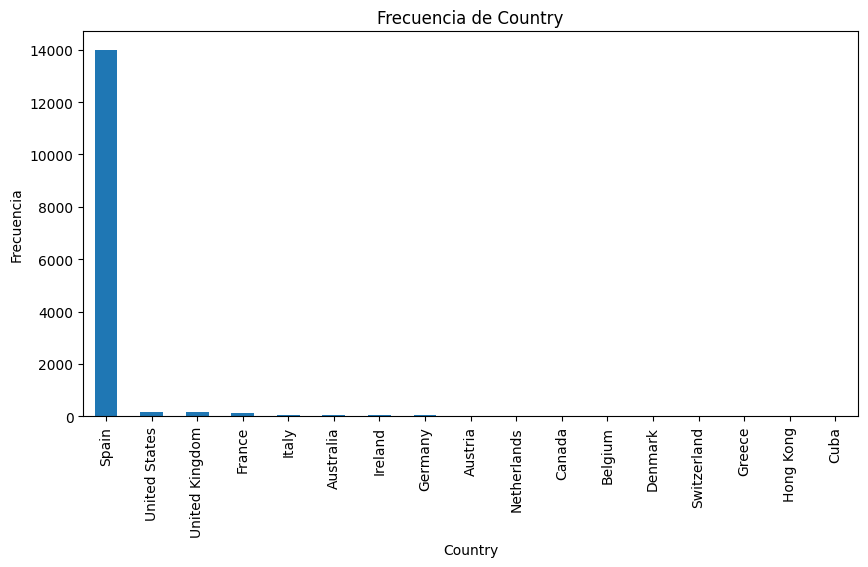

In [827]:
import matplotlib.pyplot as plt

# Variable de texto
text_var = 'Country'

# Contar las frecuencias de cada categoría
value_counts = airbnbData[text_var].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(10, 5))
value_counts.plot.bar()
plt.xlabel(text_var)
plt.ylabel('Frecuencia')
plt.title(f'Frecuencia de {text_var}')
plt.show()

Puesto que la gran mayoría de valores son para Country = 'Spain', se van a eliminar todos los valores que no corresponden a este país, para centrar el modelo únicamente en airbnb de España.

In [828]:
# Eliminamos datos cuya variable Country es distinto de Spain y por ello, la variable Country.
airbnbData = airbnbData[airbnbData['Country'] == 'Spain']

# Verificar el resultado
print(airbnbData.head())

#Eliminamos la variable
airbnbData.drop(columns=['Country'], inplace=True)

   Host Listings Count  Host Total Listings Count       City Country Code  \
1                162.0                      162.0  Barcelona           ES   
2                162.0                      162.0  Barcelona           ES   
3                 27.0                       27.0  Barcelona           ES   
4                207.0                      207.0  Barcelona           ES   
5                207.0                      207.0  Barcelona           ES   

  Country  Accommodates  Bathrooms  Bedrooms  Beds  Price  ...  \
1   Spain             4        1.0       1.0   1.0   70.0  ...   
2   Spain             4        1.0       1.0   1.0   70.0  ...   
3   Spain             8        2.0       3.0   4.0  229.0  ...   
4   Spain             5        1.0       2.0   2.0  149.0  ...   
5   Spain             6        1.0       2.0   3.0  106.0  ...   

   Availability 365  Number of Reviews  Calculated host listings count  \
1               309                  1                           1

In [829]:
# eliminar tambien la variable country Code, que será siempre ES porque Country='Spain'
airbnbData.drop(columns=['Country Code'], inplace=True)

Además, vamos a analizar las distintas ciudades de los datos.

C:\Users\elisa.gutierrez\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 135 (\x87) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\elisa.gutierrez\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


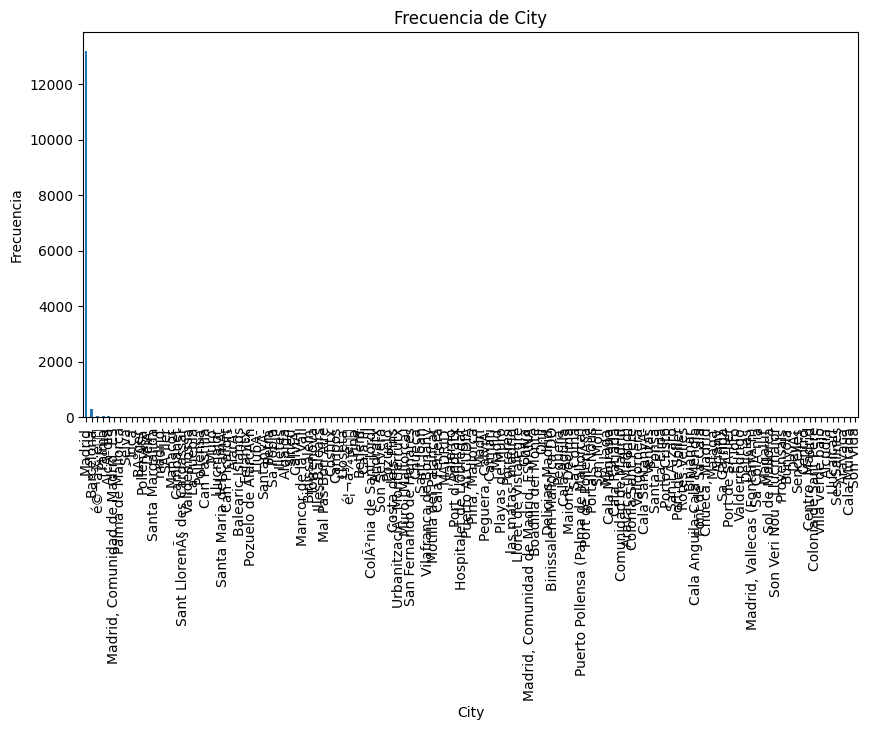

In [830]:
# Variable de texto
text_var = 'City'

# Contar las frecuencias de cada categoría
value_counts = airbnbData[text_var].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(10, 5))
value_counts.plot.bar()
plt.xlabel(text_var)
plt.ylabel('Frecuencia')
plt.title(f'Frecuencia de {text_var}')
plt.show()

Puesto que la mayoría de datos son con respecto a Madrid, eliminaremos los datos cuya ciudad sea otra y borramos esta columna, que deja de aportar valor si todos sus datos son iguales.

In [831]:
# Eliminamos datos cuya variable City es distinto de Madrid.
airbnbData = airbnbData[airbnbData['City'] == 'Madrid']

# Verificar el resultado
print(airbnbData.head())

#Eliminamos la columna City
airbnbData.drop(columns=['City'], inplace=True)

    Host Listings Count  Host Total Listings Count    City  Accommodates  \
40                  3.0                        3.0  Madrid             2   
41                  1.0                        1.0  Madrid             2   
42                  2.0                        2.0  Madrid             3   
43                  8.0                        8.0  Madrid             1   
44                  2.0                        2.0  Madrid             6   

    Bathrooms  Bedrooms  Beds  Price  Guests Included  Extra People  ...  \
40        2.0       1.0   1.0   28.0                1             5  ...   
41        1.0       0.0   1.0   58.0                1             0  ...   
42        1.0       0.0   2.0   70.0                2            15  ...   
43        1.0       1.0   1.0   26.0                1             0  ...   
44        1.0       2.0   3.0   70.0                1            10  ...   

    Availability 365  Number of Reviews  Calculated host listings count  \
40         

Ahora, vamos a seguir analizando las variables numéricas con el uso de boxplot para la observación de outliers. 
Después, se eliminarán aquellos valores que se desmarcan lo suficiente de los valores más frecuentes, según se ven en los gráficos representativos de cada variable.

Index(['Host Listings Count', 'Host Total Listings Count', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Beds', 'Price', 'Guests Included',
       'Extra People', 'Minimum Nights', 'Maximum Nights', 'Availability 30',
       'Availability 60', 'Availability 90', 'Availability 365',
       'Number of Reviews', 'Calculated host listings count',
       'hostVerificationCount', 'FeaturesCount', 'AmenitiesCount', 'Room Type',
       'Cancellation Policy', 'Bed Type', 'Property Type'],
      dtype='object')


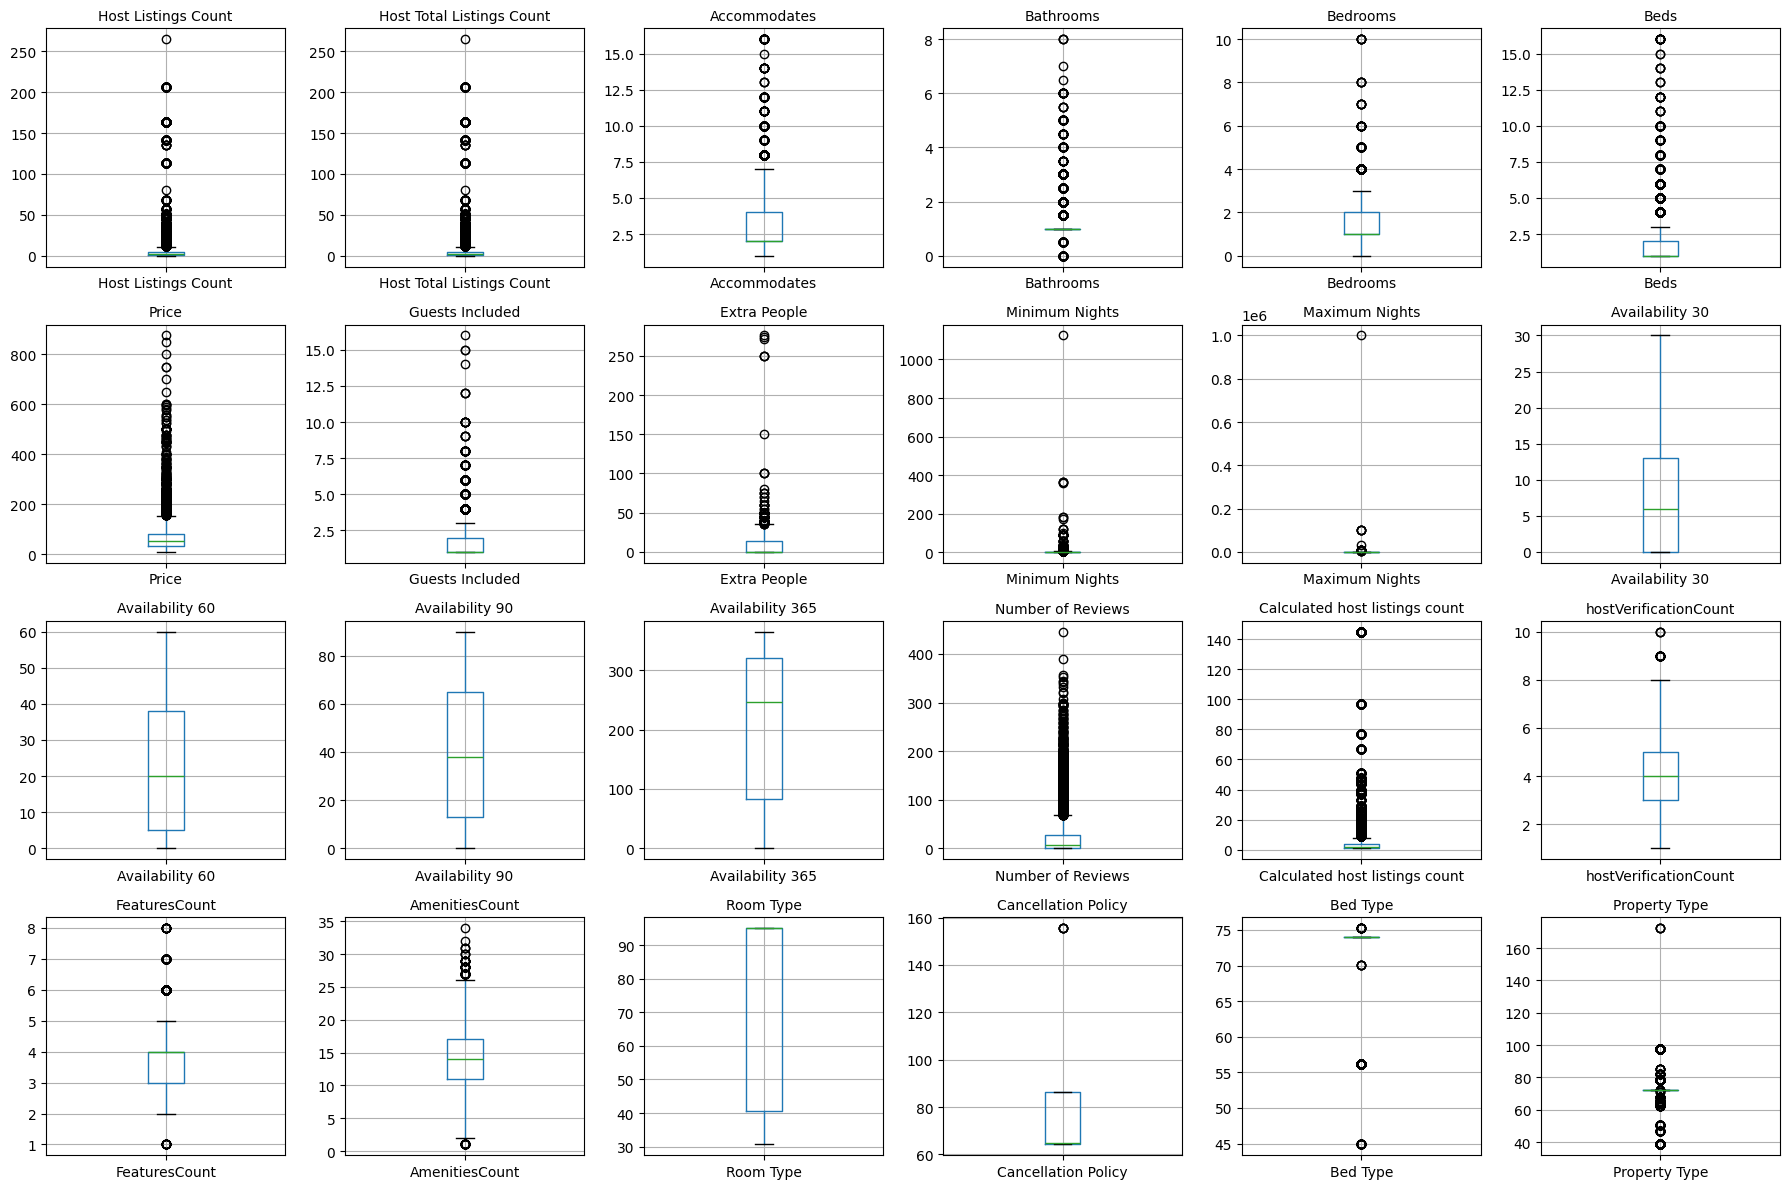

In [832]:
import matplotlib.pyplot as plt
import numpy as np

columns = airbnbData.columns
print(columns)

# Ajustar el tamaño de la figura
plt.figure(figsize=(18, 12))

# Número de columnas por fila
n_cols = 6

# Calcular el número de filas necesarias
n_rows = int(np.ceil(len(columns) / n_cols))

# Crear un boxplot para cada variable codificada
for i, var in enumerate(columns, 1):
    plt.subplot(n_rows, n_cols, i)  # (n_rows, n_cols, index)
    airbnbData.boxplot(column=var)
    plt.title(var, fontsize=10)

# Ajustar el espacio entre subgráficos
plt.tight_layout()

# Mostrar los boxplots
plt.show()

In [833]:
# Filtra la variable "Accommodates" eliminando los valores mayores o iguales a 7.5
airbnbData = airbnbData[airbnbData['Accommodates'] < 7.5]

airbnbData = airbnbData[airbnbData['Bathrooms'] < 6]

airbnbData = airbnbData[airbnbData['Bedrooms'] < 6]

airbnbData = airbnbData[airbnbData['Price'] < 180]

airbnbData = airbnbData[airbnbData['Beds'] < 5]

airbnbData = airbnbData[airbnbData['Guests Included'] < 10]

airbnbData = airbnbData[airbnbData['Extra People'] < 40]

airbnbData = airbnbData[airbnbData['Minimum Nights'] < 200]

airbnbData = airbnbData[(airbnbData['FeaturesCount'] < 5) & (airbnbData['FeaturesCount'] > 2)]


airbnbData = airbnbData[airbnbData['Cancellation Policy'] < 90]

airbnbData = airbnbData[(airbnbData['AmenitiesCount'] < 25) & (airbnbData['AmenitiesCount'] > 2)]


### Relación variables con el precio (Target)
Se van a analizar todas las variables en relación con el precio, y aquellas que no tengan una relación visual, se eliminarán para que no añadan ruido al modelo.
Para las avriables numéricas, se va a dibujar un gráfico de dispersión, y para las categóricas, un gráfico boxplot.

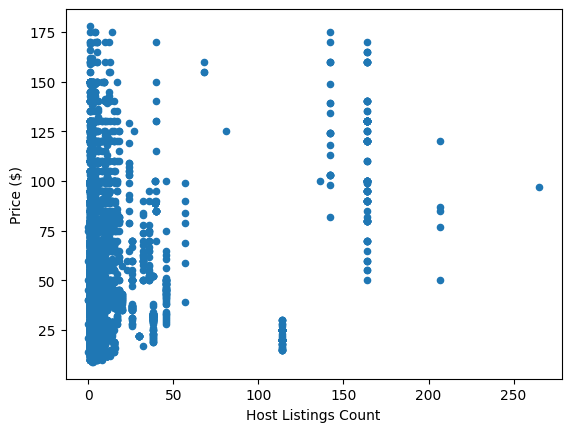

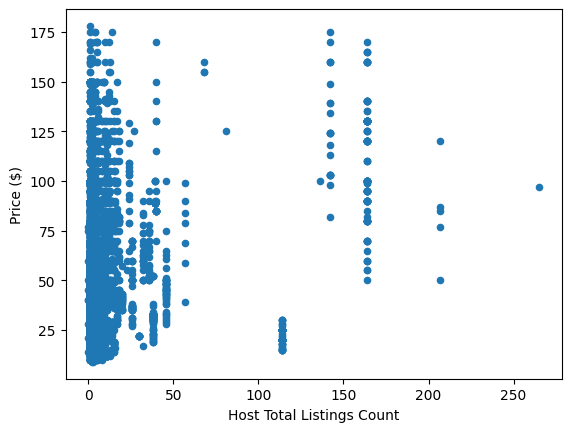

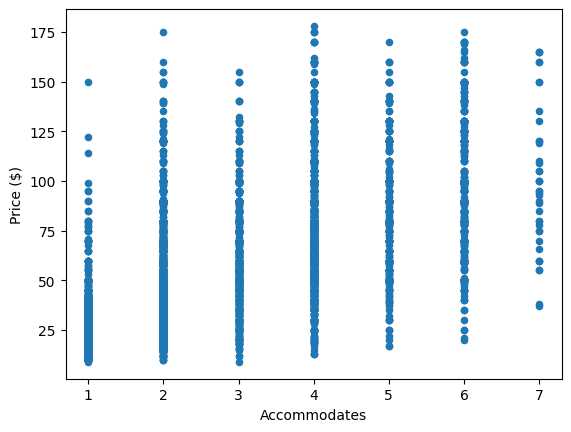

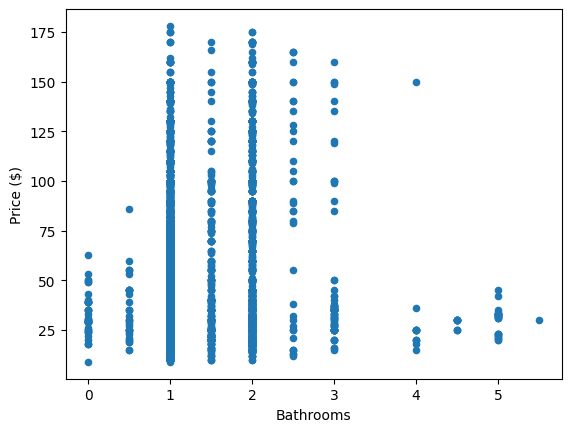

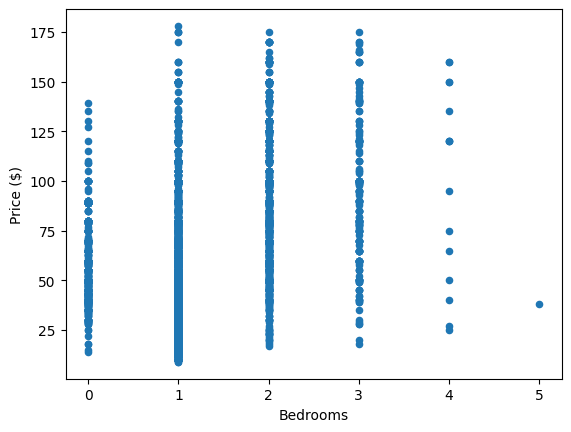

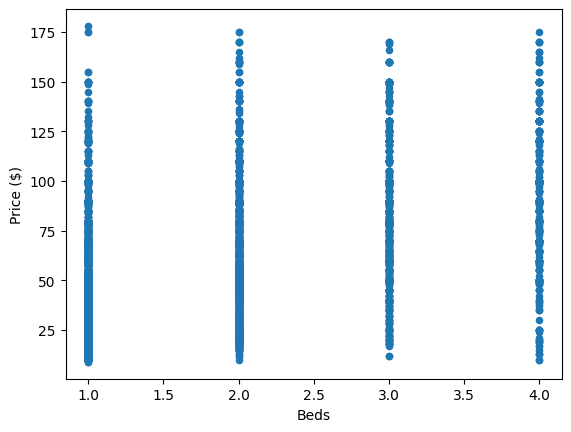

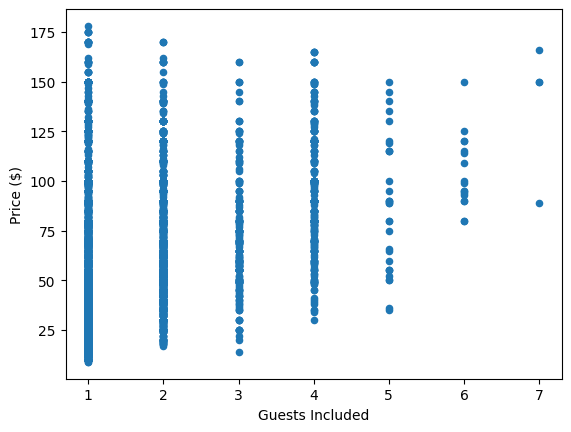

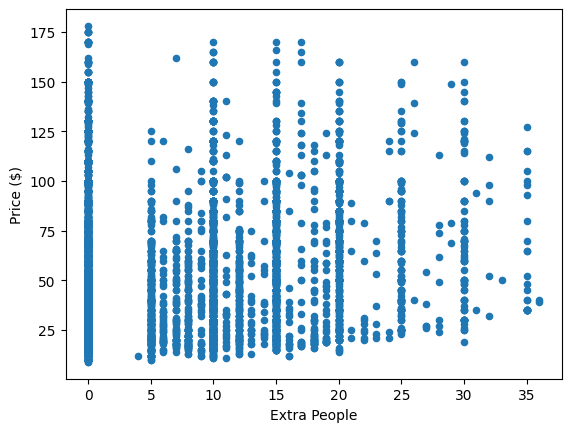

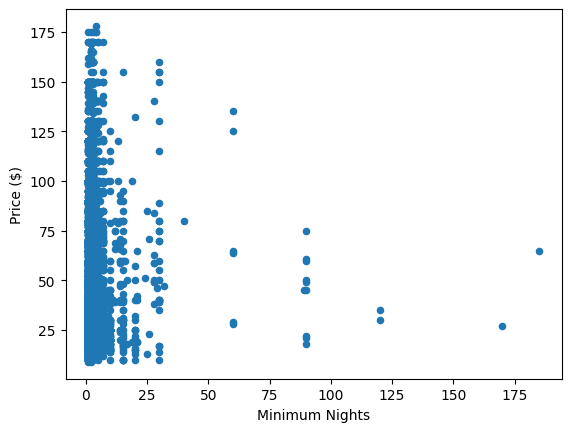

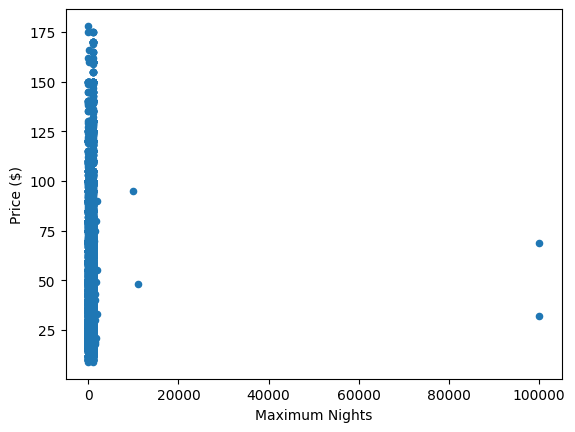

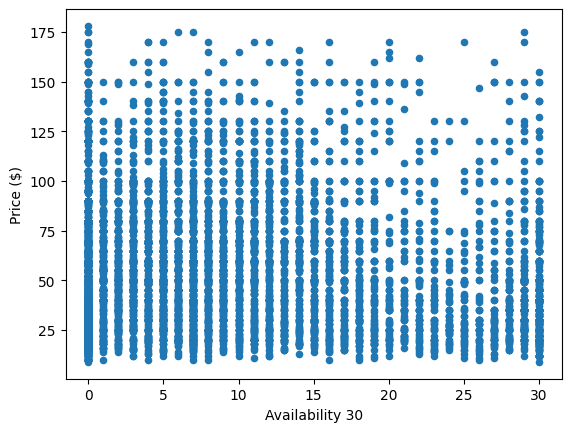

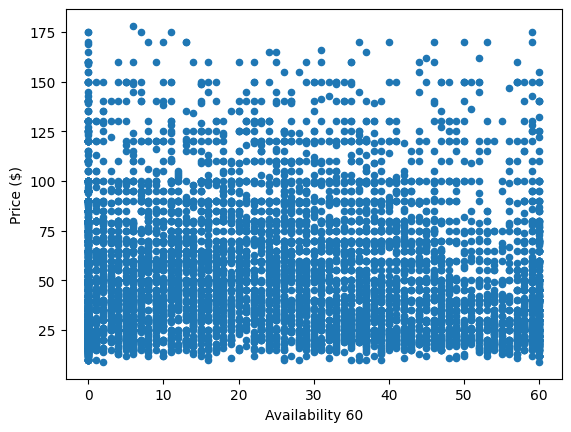

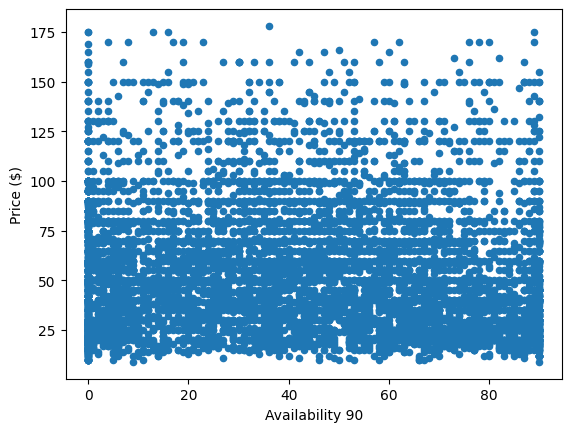

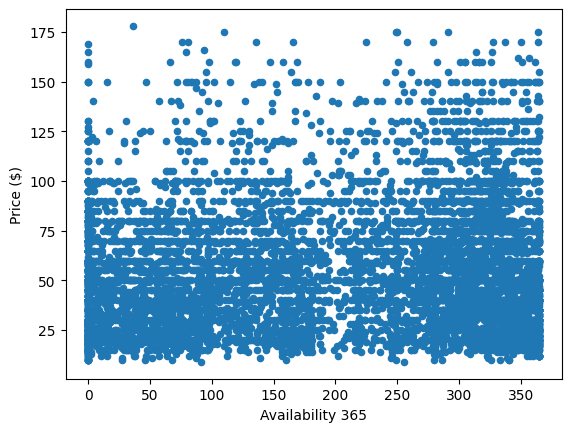

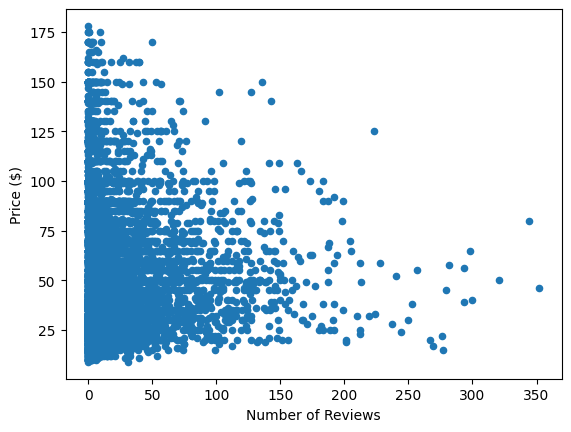

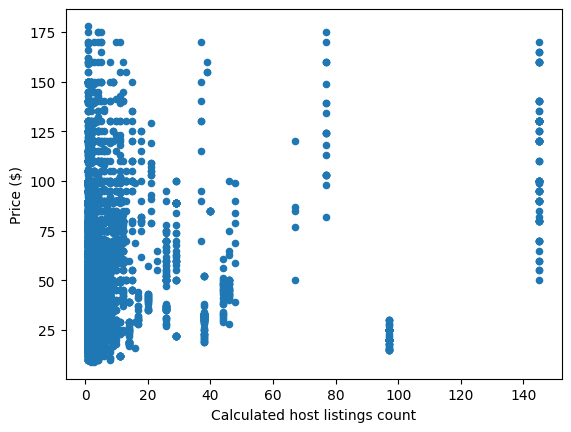

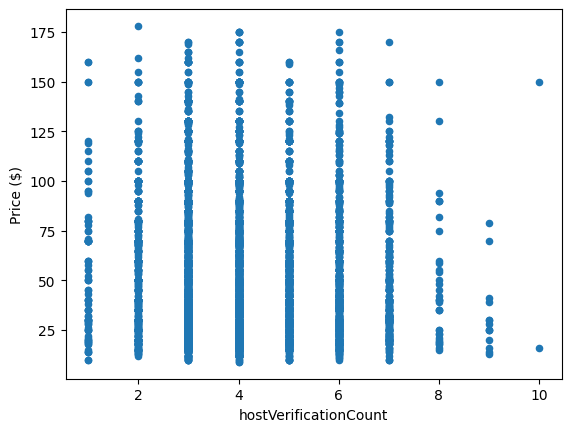

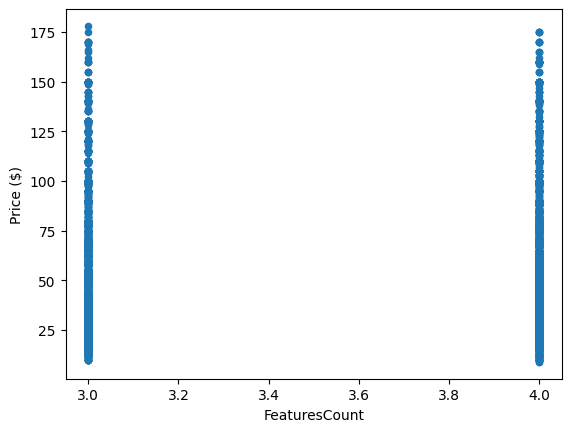

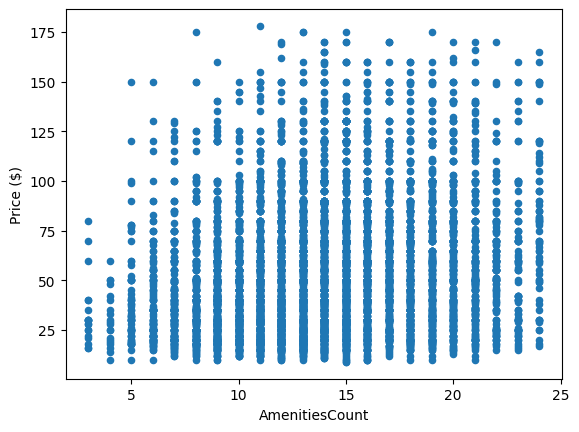

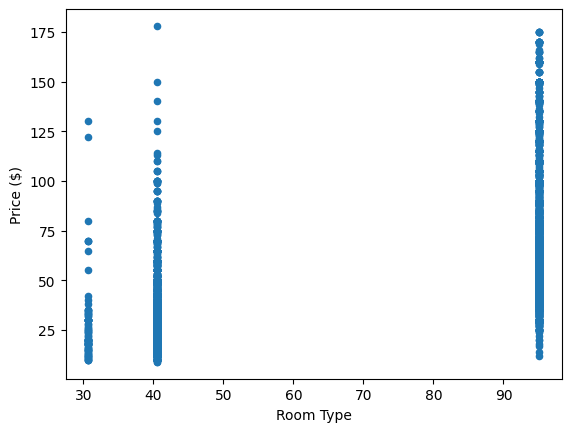

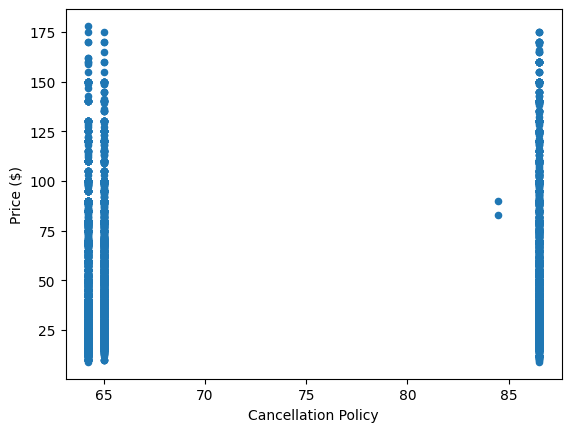

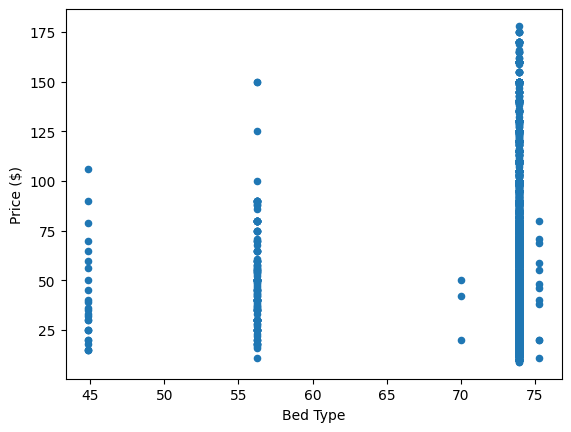

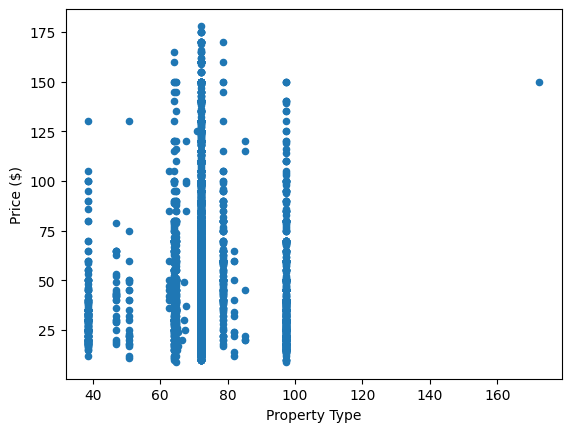

In [834]:
def plot_all_variables(df, target_var):
    for column in df.columns:
        if column != target_var:
            if df[column].dtype in ['int64', 'float64']:
                # Se crean gráficos de dispersión
                df.plot(kind='scatter', x=column, y=target_var)
                plt.xlabel(column)
                plt.ylabel(f'{target_var} ($)')
                plt.show()
            else:
                # Crear boxplots para variables categóricas
                df.boxplot(by=column, column=target_var)
                plt.xlabel(column)
                plt.ylabel(f'{target_var} ($)')
                plt.show()

# Se define Price como la variable objetivo
target_var = 'Price'

plot_all_variables(airbnbData, target_var)

Tras ver la relación de las variables del dataset con el precio, hemos visto que hay variables que no aportan valor, pues su representación gráfica frente al precio es random y no sigue un patrón ni relación. Por ello, se van a borrar del dataset.

In [835]:
columns_to_drop = ['Minimum Nights', 'Maximum Nights', 'Availability 30', 'Availability 60', 'Availability 90', 'Availability 365']
airbnbData.drop(columns=columns_to_drop, inplace=True)

### Matriz de correlación


Vamos a analizar la correlación entre todas las variables con la matriz de correlación.

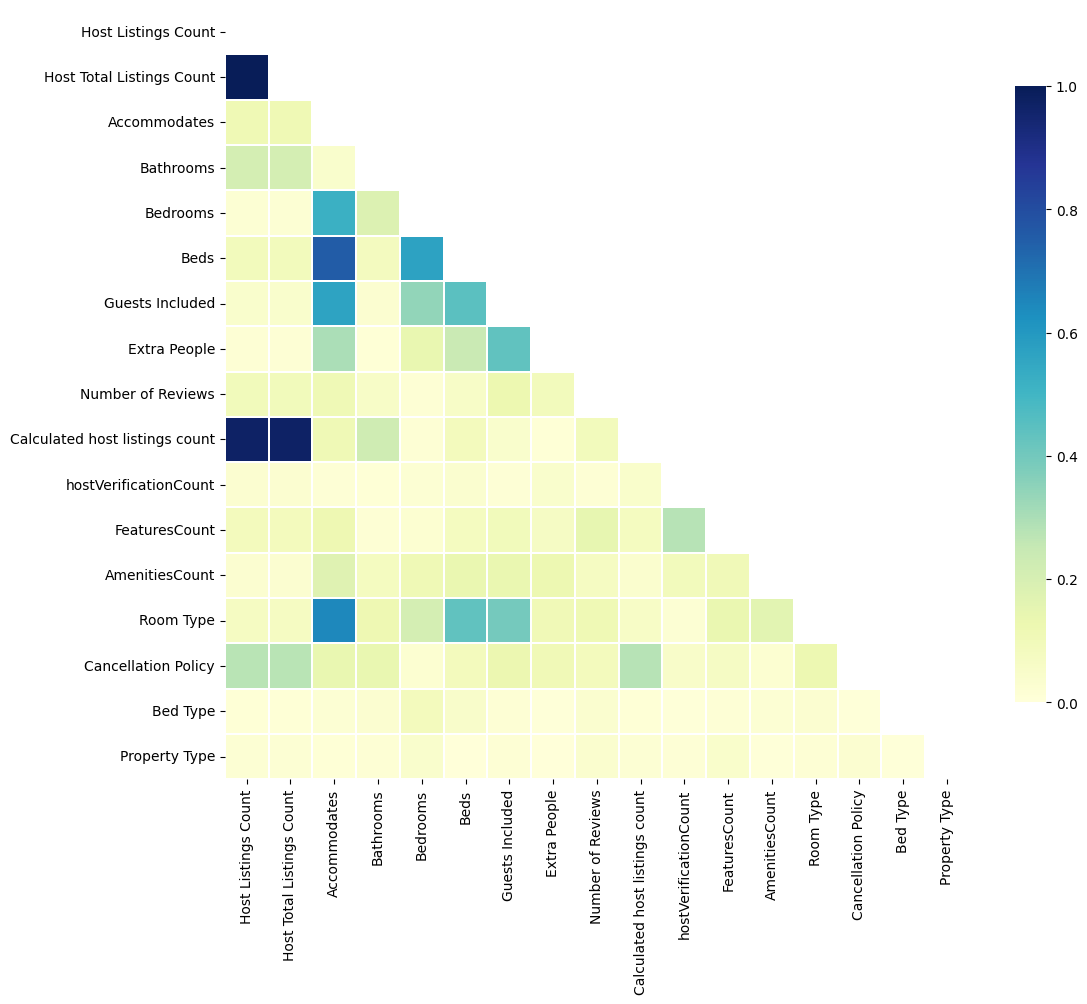

In [836]:
import numpy as np
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(airbnbData.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

Con esta matriz de correlación, podemos ver que hay variables que tienen una alta correlación. Debido a ello, sería posible descartar una de ellas porque no es del todo util analizar las dos.

En este caso, se va a eliminar la variable 'Host Total Listings Count' y la  variable 'Host Listings Count', puesto que tienen alta correlación con 'Calculated host listings count'.
Además, se va a borrar la variable Beds, que tiene mucha relación con la variable Bathrooms.

In [837]:
airbnbData.drop(columns=['Host Total Listings Count'], inplace=True)
airbnbData.drop(columns=['Host Listings Count'], inplace=True)

airbnbData.drop(columns=['Beds'], inplace=True)

## 5. Modelado, cross-validation y estudio de resultados en train y test
Antes de modelar, cargamos los datos de test y aplicamos los cambios que hemos llevado a cabo con el data set de train.


In [838]:
# Carga de datos
airbnbDataTest = pd.read_csv('./airbnbTest.csv', sep=';', decimal='.')

# Aplicamos todos los cambios realizados en el dataset de train en el dataset de test

# Listado de columnas irrelevantes a eliminar
columns_to_drop = ['ID', 'Listing Url', 'Scrape ID',  'Name', 'Summary','Space','Neighborhood Overview',
                   'Notes','Transit','Access', 
                   'Interaction', 'House Rules',
                   'Description', 'Experiences Offered', 'Thumbnail Url', 'Medium Url',
                   'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Name',
                   'Host Since', 'Host Location', 
                   'Host Thumbnail Url', 'Host Picture Url',  'Street', 
                   'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed',  'State',
                   'Zipcode', 'Market', 'Smart Location',  
                   'Calendar Updated',
                   'Calendar last Scraped','Host About', 'Host Response Time',
                    'Host Neighbourhood',  'Security Deposit',
                    'First Review', 'Last Review', 
                    'Jurisdiction Names', 'Last Scraped', 'Geolocation', 'Longitude','Latitude']

# Eliminar las columnas irrelevantes
airbnbDataTest = airbnbDataTest.drop(columns=columns_to_drop)

# Calcular el porcentaje de valores nulos en cada columna
null_percentage = airbnbDataTest.isnull().mean() * 100

# Filtrar columnas con más del 10% de valores nulos
columns_to_drop = null_percentage[null_percentage > 10].index

airbnbDataTest = airbnbDataTest.drop(columns=columns_to_drop)

# Filtrar columnas con menos del 10% de valores nulos
columns_with_few_nulls = null_percentage[null_percentage <= 10].index

# Imputar valores nulos en las columnas con menos del 10% de valores nulos usando el valor más frecuente (moda)
for column in columns_with_few_nulls:
    airbnbDataTest[column] = airbnbDataTest[column].fillna(airbnbDataTest[column].mode()[0])

# Columna Host Verifications Counts

# Añadir una nueva columna que cuente el número de valores en la columna 'Host Verifications'
airbnbDataTest['hostVerificationCount'] = airbnbDataTest['Host Verifications'].apply(lambda x: len(x.split(',')))

# Eliminar la columna 'Host Verifications'
airbnbDataTest.drop(columns=['Host Verifications'], inplace=True)

# Columna Features Counts

# Añadir una nueva columna que cuente el número de valores en la columna 'Host Verifications'
airbnbDataTest['FeaturesCount'] = airbnbDataTest['Features'].apply(lambda x: len(x.split(',')))

# Eliminar la columna 'Host Verifications'
airbnbDataTest.drop(columns=['Features'], inplace=True)

# Columna Amenities

# Añadir una nueva columna que cuente el número de valores en la columna 'Amenities count'
airbnbDataTest['AmenitiesCount'] = airbnbDataTest['Amenities'].apply(lambda x: len(x.split(',')))

# Eliminar la columna 'Amenities'
airbnbDataTest.drop(columns=['Amenities'], inplace=True)

# Usamos TargetEncoder
y = airbnbDataTest['Price']

X = airbnbDataTest['Room Type']
encoder = TargetEncoder()

# # Ajustar y transformar los datos
X_encoded = encoder.fit_transform(X, y)

# # Reemplazar la columna original con la codificada
airbnbDataTest.drop(columns=['Room Type'], inplace=True)
airbnbDataTest['Room Type'] = X_encoded.round(3)

X = airbnbDataTest['Cancellation Policy']

# # Crear el codificador
encoder = TargetEncoder()

# # Ajustar y transformar los datos
X_encoded = encoder.fit_transform(X, y)

# # Reemplazar la columna original con la codificada
airbnbDataTest.drop(columns=['Cancellation Policy'], inplace=True)
airbnbDataTest['Cancellation Policy'] = X_encoded.round(3)

# # Definir las columnas
X = airbnbDataTest['Bed Type']

# # Crear el codificador
encoder = TargetEncoder()

# # Ajustar y transformar los datos
X_encoded = encoder.fit_transform(X, y)

# # Reemplazar la columna original con la codificada
airbnbDataTest.drop(columns=['Bed Type'], inplace=True)
airbnbDataTest['Bed Type'] = X_encoded.round(3)

# # Definir las columnas
X = airbnbDataTest['Property Type']

# # Crear el codificador
encoder = TargetEncoder()

# # Ajustar y transformar los datos
X_encoded = encoder.fit_transform(X, y)

# # Reemplazar la columna original con la codificada
airbnbDataTest.drop(columns=['Property Type'], inplace=True)
airbnbDataTest['Property Type'] = X_encoded.round(3)

# Eliminamos datos cuya variable Country es distinto de Spain y por ello, la variable Country.
airbnbDataTest = airbnbDataTest[airbnbDataTest['Country'] == 'Spain']

#Eliminamos la variable
airbnbDataTest.drop(columns=['Country'], inplace=True)

# eliminar tambien la variable country Code, que será siempre ES porque Country='Spain'
airbnbDataTest.drop(columns=['Country Code'], inplace=True)

# Eliminamos datos cuya variable City es distinto de Madrid.
airbnbDataTest = airbnbDataTest[airbnbDataTest['City'] == 'Madrid']

#Eliminamos la columna City
airbnbDataTest.drop(columns=['City'], inplace=True)

# Lista de variables a filtrar
variables_a_filtrar = airbnbDataTest.columns

# Filtrar outliers para cada variable como se hizo en train
airbnbDataTest = airbnbDataTest[airbnbDataTest['Accommodates'] < 7.5]

airbnbDataTest = airbnbDataTest[airbnbDataTest['Bathrooms'] < 6]

airbnbDataTest = airbnbDataTest[airbnbDataTest['Bedrooms'] < 6]

airbnbDataTest = airbnbDataTest[airbnbDataTest['Price'] < 180]
airbnbDataTest = airbnbDataTest[airbnbDataTest['Beds'] < 5]

airbnbDataTest = airbnbDataTest[airbnbDataTest['Guests Included'] < 10]

airbnbDataTest = airbnbDataTest[airbnbDataTest['Extra People'] < 40]

airbnbDataTest = airbnbDataTest[airbnbDataTest['Minimum Nights'] < 200]

airbnbDataTest = airbnbDataTest[(airbnbDataTest['FeaturesCount'] < 5) & (airbnbDataTest['FeaturesCount'] > 2)]


airbnbDataTest = airbnbDataTest[airbnbDataTest['Cancellation Policy'] < 90]

airbnbDataTest = airbnbDataTest[(airbnbDataTest['AmenitiesCount'] < 25) & (airbnbDataTest['AmenitiesCount'] > 2)]

columns_to_drop = ['Minimum Nights', 'Maximum Nights', 'Availability 30', 'Availability 60', 'Availability 90', 'Availability 365']
airbnbDataTest.drop(columns=columns_to_drop, inplace=True)

airbnbDataTest.drop(columns=['Host Total Listings Count'], inplace=True)
airbnbDataTest.drop(columns=['Host Listings Count'], inplace=True)
airbnbDataTest.drop(columns=['Beds'], inplace=True)

# Mostrar los datos sin outliers
# Mostrar los datos sin outliers
print(airbnbData.shape)
# Mostrar los datos sin outliers
print(airbnbDataTest.shape)


(7881, 15)
(1577, 15)


Ahora podemos preparar los datos para sklearn:

In [839]:
from sklearn import preprocessing

# Pasamos la variable objetivo a la primera columna
target = airbnbData.pop('Price')
airbnbData.insert(0, 'Price', target)

targetTest = airbnbDataTest.pop('Price')
airbnbDataTest.insert(0, 'Price', targetTest)

# Dataset de train
data_train = airbnbData.values # Convertimos el DataFrame a matriz numpy
y_train = data_train[:,0:1]
X_train = data_train[:,1:]

# Dataset de test
data_test = airbnbDataTest.values # Convertimos el DataFrame a matriz numpy
y_test = data_test[:,0:1]
X_test = data_test[:,1:]



Normalizamos ambos data sets para mejorar el rendimiento del modelo.

In [840]:
# Escalamos las características
scaler = preprocessing.StandardScaler()
X_trainScaled = scaler.fit_transform(X_train)
X_testScaled = scaler.transform(X_test)

# Imprimimos las primeras 5 filas de los datasets para verificar
print("Primeras 5 filas de X_train:\n", X_train[:5])
print("Primeras 5 filas de y_train:\n", y_train[:5])
print("Primeras 5 filas de X_test:\n", X_test[:5])
print("Primeras 5 filas de y_test:\n", y_test[:5])

Primeras 5 filas de X_train:
 [[  2.      2.      1.      1.      5.    171.      3.      3.      3.
    7.     40.545  64.228  73.937  72.064]
 [  2.      1.      0.      1.      0.     52.      1.      3.      3.
   13.     95.096  65.029  73.937  72.064]
 [  3.      1.      0.      2.     15.     36.      1.      5.      4.
   17.     95.096  64.228  73.937  72.064]
 [  1.      1.      1.      1.      0.     15.      7.      3.      3.
   11.     40.545  86.508  73.937  72.064]
 [  6.      1.      2.      1.     10.      0.      2.      5.      4.
   21.     95.096  65.029  73.937  72.064]]
Primeras 5 filas de y_train:
 [[28.]
 [58.]
 [70.]
 [26.]
 [70.]]
Primeras 5 filas de X_test:
 [[ 1.     1.     1.     1.     0.    17.     3.     4.     4.    17.
  39.137 64.929 50.485 71.22 ]
 [ 2.     1.     1.     1.    25.     0.     1.     6.     3.    12.
  95.4   84.778 73.489 71.22 ]
 [ 1.     1.     1.     1.     0.     1.     1.     6.     3.    12.
  39.137 64.929 73.489 71.22 ]
 [ 1

## Algoritmo Regresión Lasso.

A continuación, con el siguiente código se busca de manera automática el mejor valor del parámetro alpha para un modelo de Lasso (una regresión lineal con regularización) usando validación cruzada.

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................alpha=0.10481131341546858; total time=   0.0s
[CV] END ..........................alpha=0.104

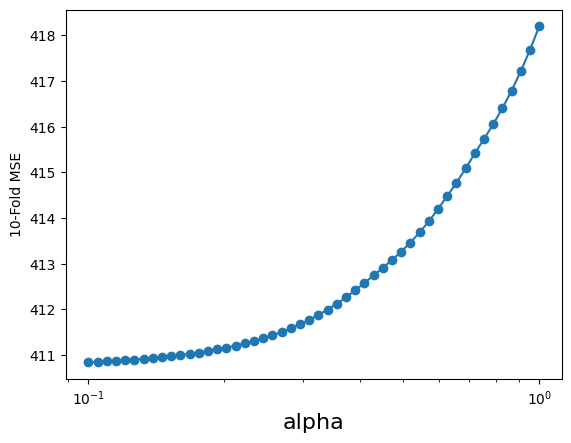

In [841]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-1,0,50) # Se busca el mejor valor de alpha entre 10^-1 y 1. 50 valores en total
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring='neg_mean_squared_error', param_grid=param_grid, cv=10, verbose=2)
grid.fit(X_trainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('10-Fold MSE')
plt.show()

Encontramos que el mejor valor para alpha es 0.1.
Teniendo en cuenta esto, podemos entrenar de nuevo el modeo con este valor y poder calcular el error cuadrático medio.

In [842]:
alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(X_trainScaled,y_train)

ytrainLasso = lasso.predict(X_trainScaled)
ytestLasso  = lasso.predict(X_testScaled)

# Calcular MSE
mseTrainModelLasso = np.mean((y_train - ytrainLasso) ** 2)
mseTestModelLasso = np.mean((y_test - ytestLasso) ** 2)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

feature_names = airbnbData.columns[1:] # es igual en train y en test

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 1.49e+03
MSE Modelo Lasso (test) : 1.5e+03
RMSE Modelo Lasso (train): 38.6
RMSE Modelo Lasso (test) : 38.7
Accommodates 7.274924057835846
Bathrooms 1.2376185851840096
Bedrooms 4.648185063320389
Guests Included 0.9066323852251801
Extra People -1.078107676737649
Number of Reviews -2.6161178747513207
Calculated host listings count 2.612585273491522
hostVerificationCount -1.2155613261097473
FeaturesCount 0.49781611901098394
AmenitiesCount 2.823531815563994
Room Type 14.292443195735073
Cancellation Policy 0.0926966132648693
Bed Type 0.3634106850944526
Property Type -0.34005142282930195


### Conclusiones Lasso
En los resultados del modelo Lasso, se observa que el **MSE (Error Cuadrático Medio)** para los datos de entrenamiento es de **1.49e+03** y para los de prueba es de **1.5e+03**, lo que indica que el modelo tiene un error relativamente bajo en la predicción de los precios. Por otro lado, los valores de **RMSE (Raíz del Error Cuadrático Medio)** para el conjunto de entrenamiento y prueba son **38.6** y **38.7**, respectivamente. Esto significa que el modelo tiene un error promedio de alrededor de **38.6** unidades monetarias en el conjunto de entrenamiento y **38.7** en el conjunto de prueba.

Considerando que el precio medio de los Airbnbs en este conjunto de datos es de **73.56**, el RMSE de **38.6** y **38.7** implica que el error es aproximadamente del **52-53%** en relación con el precio medio, lo que sugiere que, aunque el modelo proporciona predicciones razonables, todavía existe un margen considerable de mejora.

En cuanto a los **coeficientes** de las variables:
- **Accommodates** tiene un coeficiente positivo de **7.27**, lo que indica que a medida que aumenta el número de huéspedes, el precio tiende a aumentar.
- **Bathrooms** presenta un coeficiente de **1.24**, lo que sugiere que un mayor número de baños está relacionado con un incremento en el precio.
- **Bedrooms**, con un coeficiente de **4.65**, indica que un mayor número de habitaciones también aumenta el precio del alojamiento.
- **Guests Included** tiene un coeficiente de **0.97**, lo que implica que, en general, más huéspedes tienden a incrementar ligeramente el precio.
- **Extra People**, con un coeficiente negativo de **-1.07**, sugiere que agregar más personas adicionales al alojamiento reduce el precio, lo cual podría deberse a que esta opción representa un costo adicional más que un incremento directo en el precio base.
- **Number of Reviews** tiene un coeficiente negativo de **-2.62**, lo que podría indicar que un mayor número de reseñas se asocia con una ligera disminución en el precio promedio, aunque este efecto podría depender de factores específicos no considerados en el análisis.

En resumen, aunque el modelo tiene un margen de error significativo, los coeficientes obtenidos permiten interpretar cómo cada variable influye en el precio de los Airbnbs. En general, se observa que el número de huéspedes, baños y habitaciones tiende a aumentar el precio, mientras que factores como el número de reseñas y las personas adicionales tienen una influencia más compleja y pueden reducir el precio.

### Boosted Trees


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

Niterations = [100,500,1000,1500,2000]
learningRate = [0.1,0.05,0.5,0.01]

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=5), param_grid=param_grid, cv = 3, verbose=2)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

lrOptimo = grid.best_params_['learning_rate']
neOptimo = grid.best_params_['n_estimators']
bt = GradientBoostingRegressor(random_state=0, max_depth=3,learning_rate=lrOptimo, n_estimators=neOptimo)
bt.fit(X_train,y_train)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train,y_train),bt.score(X_test,y_test)))
plt.grid()
plt.show()




Fitting 3 folds for each of 20 candidates, totalling 60 fits


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ................learning_rate=0.1, n_estimators=100; total time=   1.0s


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ................learning_rate=0.1, n_estimators=100; total time=   1.4s


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ................learning_rate=0.1, n_estimators=100; total time=   1.1s


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ................learning_rate=0.1, n_estimators=500; total time=   7.4s


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


*TENER EN CUENTA:*

- grid = GridSearchCV(KNeighborsClassifier(), scoring= 'accuracy', param_grid=param_grid, cv = 5, verbose=2).fit(X_train, y_train)

- Por tanto, examinando la diferencia en las prestaciones entre el conjunto de entrenamiento/validación y test, puedes saber si estás en alguna de las siguientes situaciones:

* **Alto sesgo**: error de entrenamiento/validación y error en test similar, pero muy alto. Cuando esto sucede podemos
    * Aumentar el número de variables / características
    * Aumentar el grado del polinomio (mayor complejidad)
* **Alta varianza**: gran diferencia entre error de entrenamiento/validación y test con un error de entrenamiento pequeño
    * Aumentar el número de muestras de entrenamiento
    * Reducir el número de variables / características



- LO QUE QUEREMOS CONSEGUIR ES GENERALIZAR LO MÁXIMO POSIBLE, ESTO SE DEMUESTRA TENIENDO EL ERROR MAS BAJO POSIBLE EN TEST.


- Dimensionalidad -> cuántas mas dimentsiones, más complejidad se añade al problema.

- si nuestros datos están sesgados, el modelo lo estará tambien.

- para manipular el conjunto de test:
    - normalizacion e variables -> basandonos en el conjunto de train
    - seleccion de caracteristicas -> basandonos en el conjunto de train

- a veces los valores null tienen un motivo. 

- metodos: fit & transform. 

- se puede normalizar en train y tambien aplicar a test

- ML pipeline:
    - adquisición de datos -> ya los tenemos correctamente en un fichero csv. SPLIT en train y test
    - análisis exploratorio -> 
    -preprocesamiento
    - algoritmo ML
    - optimizamos
    - predecimos


- errores muy distintos -> overfitting

![image.png](attachment:image.png)



overfitting:
- regularizacion -> lasso y ridge regression
- seleccion de caracteristicas
-> aplicarlo sin aumentar el sesgo.

 ridge regression:
 - 

![image-2.png](attachment:image-2.png)

Al profe LASSO le encanta.


SELECCION DE CARACTERISTICAS.
- encontrar motivos para quedarnos con unas y no con otras.
- eliminar las irrelevantes.
-  motivacion para la seleccion de caracteristicas:
![image-3.png](attachment:image-3.png)

se busca una solucion sparse, con pocas columnas.

esto ayudará al sobreajuste.

- antes de eliminar columnas, se hace el train/test.
- esto de eliminar columnas es parte de la exploración, que se hace solo con el train.
- pasos:
    - eliminamos columans en los datos de train.
    - entrenamos el modelo.
    - eliminamos las columnas de los datos de train.


qué pasos ayudan a la selección de características:
- valor relativo de parámetros. -> valor relativo de la variable por si misma, el valor indivisual, sin tener en cuenta el conjunto con otra variable. 
- matriz correlación -> 1 es máxima correlacion. se comportan igual que sí misma. Nos indica qué valores eliminar. 


métodos de filtrado:
- se evalua la relevancia de cada caracteristica de forma individual.
- las var menos relevantes, se pueden eliminar.
- con las var seleccionadas, entrenamos el modelo.
- como inconveniente, no tienen en cuenta interacciones entre variables.
- métodos de hacr la escala de importancia de variables. para regresion: f_regrression o mutual_info_regression.


caso real:
cargar los datos
convertir a metros cuadrados los pies:
![image-4.png](attachment:image-4.png)
renombramos las columnas
añadimos nuevas variables.


correlacion entre variabels:
- si hay una correlacion muy alta entre variables, se puede descartar una porque no es del todo util analizar las dos.

- con los métodos de filtrado, da las relaciones lineales.  cual de los dos tipos uso???'


METODOS WRAPPER.


*TENER EN CUENTA:*

- grid = GridSearchCV(KNeighborsClassifier(), scoring= 'accuracy', param_grid=param_grid, cv = 5, verbose=2).fit(X_train, y_train)

- Por tanto, examinando la diferencia en las prestaciones entre el conjunto de entrenamiento/validación y test, puedes saber si estás en alguna de las siguientes situaciones:

* **Alto sesgo**: error de entrenamiento/validación y error en test similar, pero muy alto. Cuando esto sucede podemos
    * Aumentar el número de variables / características
    * Aumentar el grado del polinomio (mayor complejidad)
* **Alta varianza**: gran diferencia entre error de entrenamiento/validación y test con un error de entrenamiento pequeño
    * Aumentar el número de muestras de entrenamiento
    * Reducir el número de variables / características



- LO QUE QUEREMOS CONSEGUIR ES GENERALIZAR LO MÁXIMO POSIBLE, ESTO SE DEMUESTRA TENIENDO EL ERROR MAS BAJO POSIBLE EN TEST.


- Dimensionalidad -> cuántas mas dimentsiones, más complejidad se añade al problema.

- si nuestros datos están sesgados, el modelo lo estará tambien.

- para manipular el conjunto de test:
    - normalizacion e variables -> basandonos en el conjunto de train
    - seleccion de caracteristicas -> basandonos en el conjunto de train

- a veces los valores null tienen un motivo. 

- metodos: fit & transform. 

- se puede normalizar en train y tambien aplicar a test

- ML pipeline:
    - adquisición de datos -> ya los tenemos correctamente en un fichero csv. SPLIT en train y test
    - análisis exploratorio -> 
    -preprocesamiento
    - algoritmo ML
    - optimizamos
    - predecimos


- errores muy distintos -> overfitting

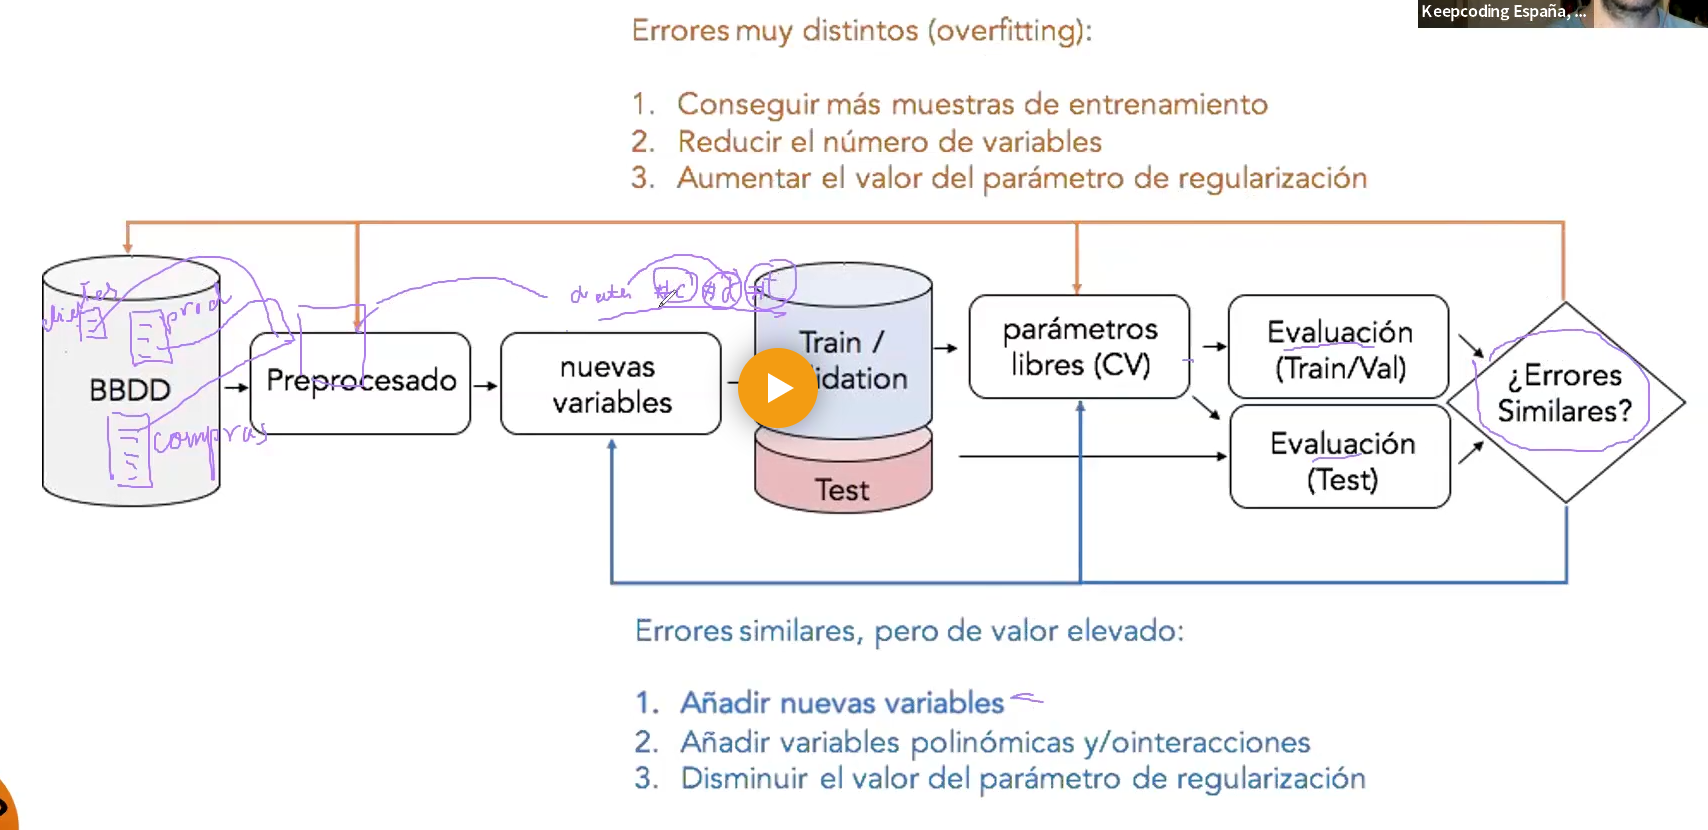



overfitting:
- regularizacion -> lasso y ridge regression
- seleccion de caracteristicas
-> aplicarlo sin aumentar el sesgo.

 ridge regression:
 - 

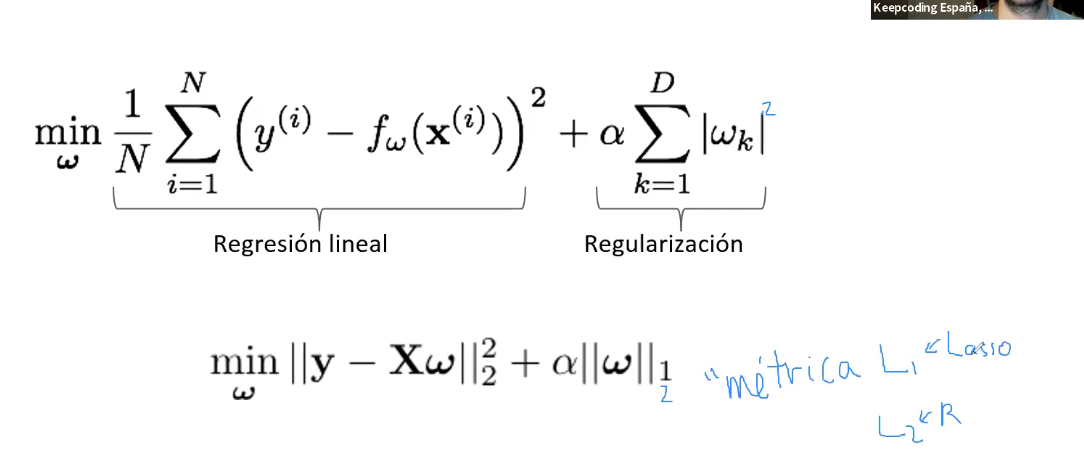

Al profe LASSO le encanta.


SELECCION DE CARACTERISTICAS.
- encontrar motivos para quedarnos con unas y no con otras.
- eliminar las irrelevantes.
-  motivacion para la seleccion de caracteristicas:
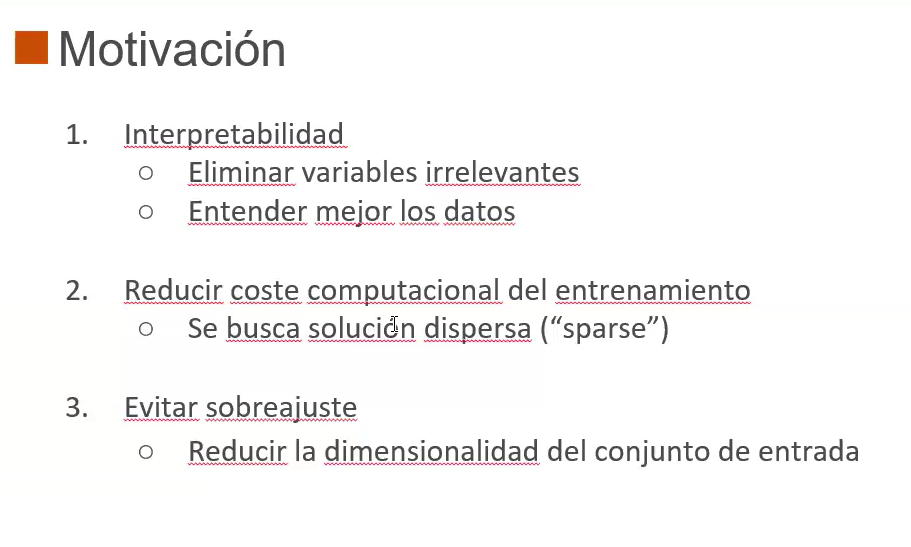

se busca una solucion sparse, con pocas columnas.

esto ayudará al sobreajuste.

- antes de eliminar columnas, se hace el train/test.
- esto de eliminar columnas es parte de la exploración, que se hace solo con el train.
- pasos:
    - eliminamos columans en los datos de train.
    - entrenamos el modelo.
    - eliminamos las columnas de los datos de train.


qué pasos ayudan a la selección de características:
- valor relativo de parámetros. -> valor relativo de la variable por si misma, el valor indivisual, sin tener en cuenta el conjunto con otra variable. 
- matriz correlación -> 1 es máxima correlacion. se comportan igual que sí misma. Nos indica qué valores eliminar. 


métodos de filtrado:
- se evalua la relevancia de cada caracteristica de forma individual.
- las var menos relevantes, se pueden eliminar.
- con las var seleccionadas, entrenamos el modelo.
- como inconveniente, no tienen en cuenta interacciones entre variables.
- métodos de hacr la escala de importancia de variables. para regresion: f_regrression o mutual_info_regression.


caso real:
cargar los datos
convertir a metros cuadrados los pies:
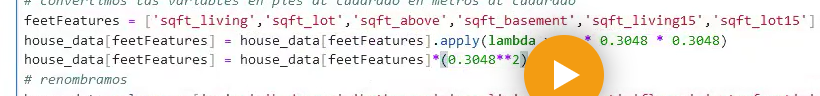
renombramos las columnas
añadimos nuevas variables.


correlacion entre variabels:
- si hay una correlacion muy alta entre variables, se puede descartar una porque no es del todo util analizar las dos.

- con los métodos de filtrado, da las relaciones lineales.  cual de los dos tipos uso???'


METODOS WRAPPER.
